## Install the necessary libraries

In [406]:
!pip install tensorflow pandas numpy matplotlib sklearn seaborn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=0a87c1f797937a768a1726eb7413451845352012a3696a31d8218c3f04ed2df7
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


# Importing all the necessary libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and
TensorFlow's Keras module, enabling data manipulation, visualization etc..

In [395]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import seaborn as sns

# Data Reading and Manipulation

In [396]:
# Read the dataset
data = pd.read_csv('/content/dataset_phishing.csv')


data['status'] = data['status'].replace('legitimate', 1)
data['status'] = data['status'].replace('phishing', 0)

# Data Visualization
## Pie chart for checking any imbalance

<Axes: ylabel='status'>

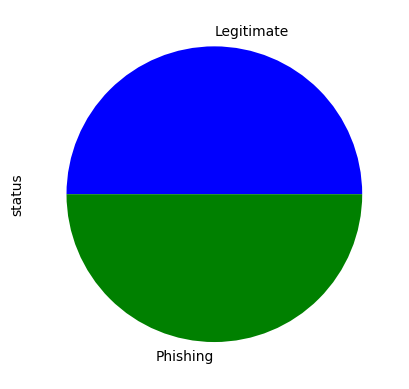

In [397]:
data['status'].value_counts().plot(kind = 'pie', colors = ['blue', 'green'], labels=['Legitimate', 'Phishing'])

## Train-Test Data Separation


In [398]:
X = data.drop(['url', 'status'], axis = 1).astype(int)
Y = data['status'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

## Correlation matrix

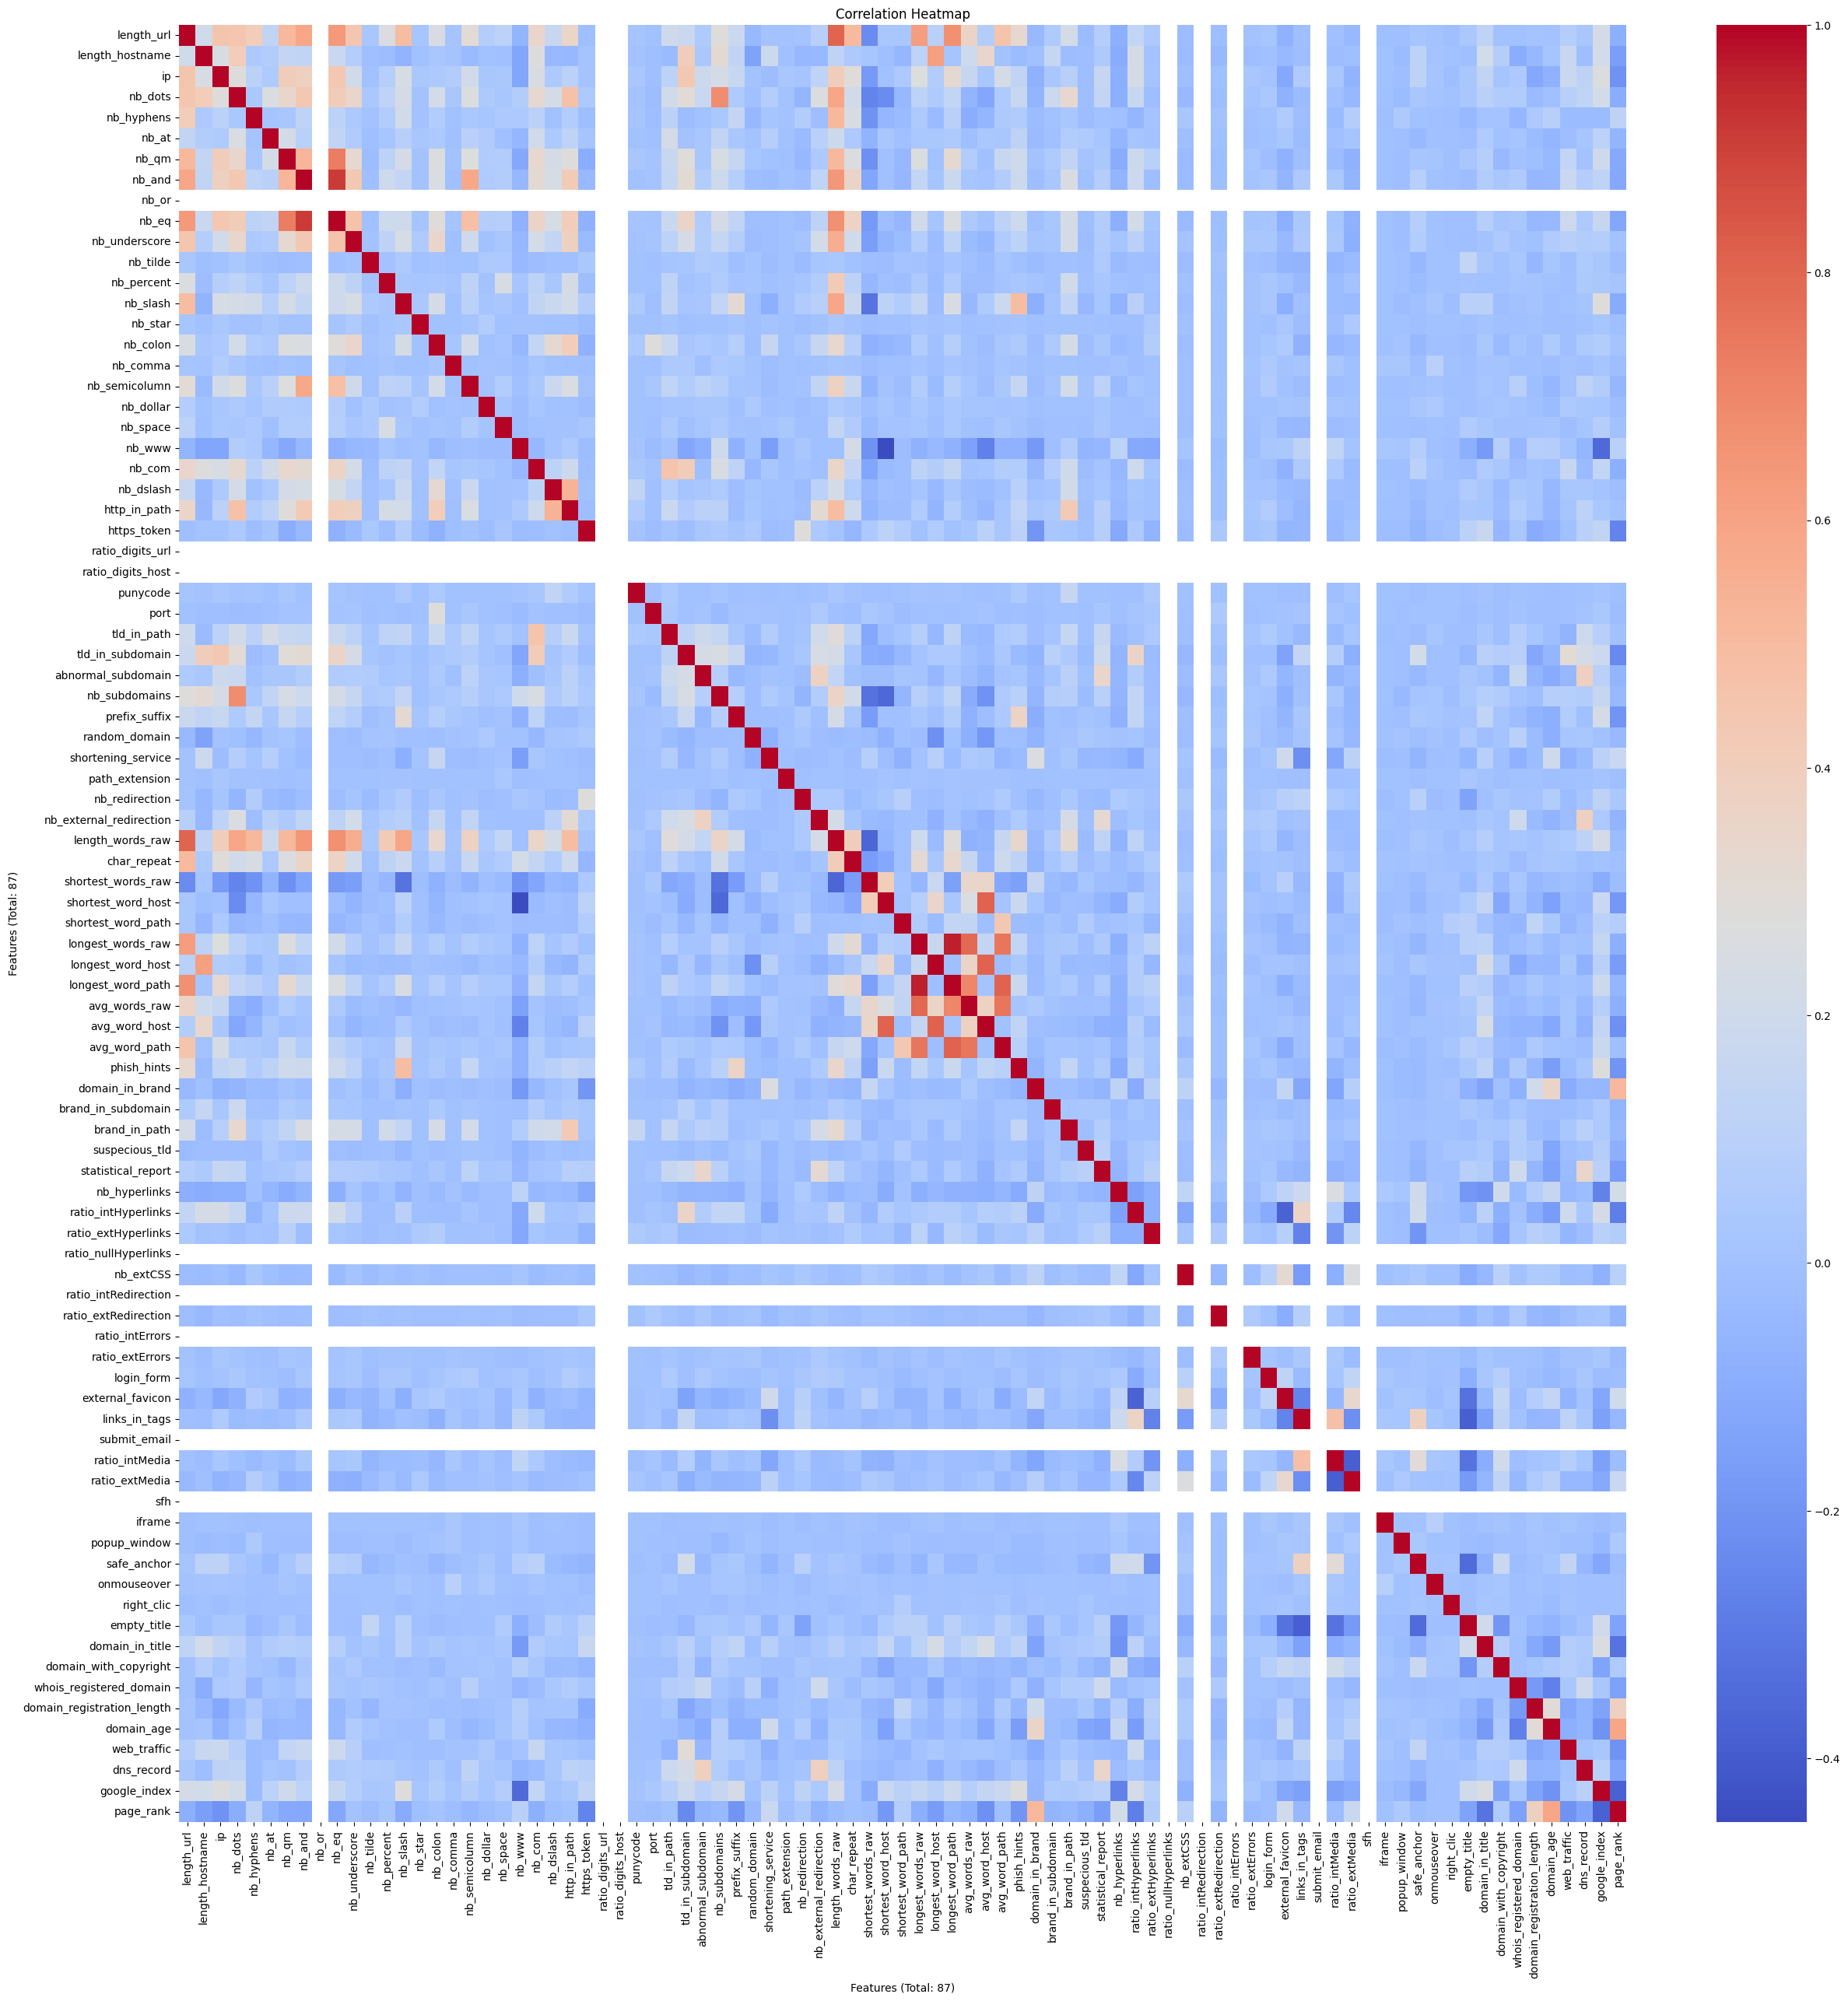

In [399]:
mat = X_train.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(mat, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xlabel(f'Features (Total: {mat.shape[1]})')
plt.ylabel(f'Features (Total: {mat.shape[1]})')
plt.show()

## Model Architecture
The model architecture combines a 1D Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM). The main reason for including the LSTM layer is to identify relevant recurring patterns in the data. The model is built using the Keras library with a sequential structure.



In [400]:
# Build the model
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, input_shape=(87,1), kernel_size=2, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),

    keras.layers.LSTM(100),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.Dense(2, activation='sigmoid'),
])


## Defining Loss and Metrics for Model
The loss function used here is sparse categorical cross entropy, which returns one-hot encodings.

In [401]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model training
The model is trained with 30 epochs, with the default batch size.

In [402]:
history = model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
251/251 [==============================] - 32s 113ms/step - loss: 0.4333 - accuracy: 0.7764
Epoch 2/30
251/251 [==============================] - 20s 81ms/step - loss: 0.2514 - accuracy: 0.9061
Epoch 3/30
251/251 [==============================] - 13s 50ms/step - loss: 0.2235 - accuracy: 0.9163
Epoch 4/30
251/251 [==============================] - 13s 50ms/step - loss: 0.2141 - accuracy: 0.9216
Epoch 5/30
251/251 [==============================] - 13s 50ms/step - loss: 0.1940 - accuracy: 0.9290
Epoch 6/30
251/251 [==============================] - 13s 50ms/step - loss: 0.1919 - accuracy: 0.9294
Epoch 7/30
251/251 [==============================] - 13s 50ms/step - loss: 0.1779 - accuracy: 0.9355
Epoch 8/30
251/251 [==============================] - 13s 51ms/step - loss: 0.1718 - accuracy: 0.9405
Epoch 9/30
251/251 [==============================] - 13s 52ms/step - loss: 0.1552 - accuracy: 0.9421
Epoch 10/30
251/251 [==============================] - 13s 52ms/step - loss: 0.15

## Quantifying Misclassifications
The number of misclassifications by the model, for the training data.

In [403]:
Y_pred = model.predict(X_train)
cnt = 0
for i in range(len(Y_pred)):
    if(np.argmax(Y_pred[i]) != np.array(Y_train)[i]):
      cnt = cnt + 1
print(cnt)

251/251 [==============================] - 4s 15ms/step
222


## Testing the model
model.evaulate() is an inbuilt function that helps us evaluate the test accuracy.

In [405]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_accuracy)

108/108 [==============================] - 3s 26ms/step - loss: 0.1230 - accuracy: 0.9565
0.9565470814704895
